Right and left eye fundus photographs of 5000 patients

<div class="alert alert-info" style="background-color:#E88209; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Ocular Disease Recognition</h2>
</div>

 # About Dataset

Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

Normal (N),

Diabetes (D),

Glaucoma (G),

Cataract (C),

Age related Macular Degeneration (A),

Hypertension (H),

Pathological Myopia (M),

Other diseases/abnormalities (O)

In [81]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


<div class="alert alert-info" style="background-color:#E88209; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>READ AND
EXPLORE THE FILE STRUCTURE</h2>
</div>

In [82]:
# Initialize an empty list to store file paths
file_path_list = []

# Walk through the directory and its subdirectories
for dirname, _, filenames in os.walk('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K'):
    for filename in filenames:
        # Append the directory name and filename as a tuple to the list
        file_path_list.append((dirname, filename))

# Display the collected file paths
file_path_list

[('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K',
  'data.xlsx'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K',
  '~$data.xlsx'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\Testing Images',
  '1000_left.jpg'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\Testing Images',
  '1000_right.jpg'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\Testing Images',
  '1001_left.jpg'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\Testing Images',
  '1001_right.jpg'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\Testing Images',
  '1002_left.jpg'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\Testing Images',
  '1002_right.jpg'),
 ('C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\Testing Images',
  '1003_left.jpg'),
 ('C:\\Users\\helo

Here we have train, test images and an Excel file. Let's start with the Excel file.

<div class="alert alert-info" style="background-color:#E88209; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Read one file</h2>
</div>

In [83]:
data_df = pd.read_excel(open("C:\\Users\\helov\\OneDrive\\Documents\\ocular disease\\ODIR-5K\\ODIR-5K\\data.xlsx",'rb'), sheet_name='Sheet1')  

In [84]:
data_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [85]:
# We will change the labels for the columns so it will be easier to process.
data_df.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", "right_diagnosys", "normal",
                  "diabetes", "glaucoma", "cataract", "amd", "hypertension", "myopia", "other"]

In [86]:
data_df

,id,age,sex,left_fundus,right_fundus,left_diagnosys,right_diagnosys,normal,diabetes,glaucoma,cataract,amd,hypertension,myopia,other
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


<div class="alert alert-info" style="background-color:#E88209; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>EXPLORATORY DATA ANALYSIS (EDA)</h2>
</div>

In [89]:
print(f"data shape: {data_df.shape}")
print(f"left fundus: {data_df['left_fundus'].nunique()}")
print(f"right fundus: {data_df['right_fundus'].nunique()}")

data shape: (3500, 15)
left fundus: 3500
right fundus: 3500


We have 3500 records, and unique images associated with each record for left and respectively right eye.

# Check Image Data

In [91]:
print(f"test images: {len(os.listdir('C://Users//helov//OneDrive//Documents//ocular disease//ODIR-5K//ODIR-5K//Testing Images'))}")
print(f"train images: {len(os.listdir('C://Users//helov//OneDrive//Documents//ocular disease//ODIR-5K//ODIR-5K//Training Images'))}")
print(f"train images - left eye: {len(glob.glob('C://Users//helov//OneDrive//Documents//ocular disease//ODIR-5K//ODIR-5K//Training Images//*_left.jpg'))}")
print(f"train images - right eye: {len(glob.glob('C://Users//helov//OneDrive//Documents//ocular disease//ODIR-5K//ODIR-5K//Training Images//*_right.jpg'))}")
print(f"test images - left eye: {len(glob.glob('C://Users//helov//OneDrive//Documents//ocular disease//ODIR-5K//ODIR-5K//Testing Images//*_left.jpg'))}")
print(f"test images - right eye: {len(glob.glob('C://Users//helov//OneDrive//Documents//ocular disease//ODIR-5K//ODIR-5K//Testing Images//*_right.jpg'))}")

test images: 1000
train images: 7000
train images - left eye: 3500
train images - right eye: 3500
test images - left eye: 500
test images - right eye: 500


There are 7000 images in training set and 1000 images in testing set, with half of them for left eye and half of them for right eye.

Each patient has a diagnosis for both their left and right eyes, but there is only one flag indicating if they have a specific condition like cataract. To determine which eye the condition applies to, we need to check the separate diagnoses for each eye.

For example, consider a patient who is a 69-year-old female with patient ID 0. She has a flag indicating she has cataract. By looking at the individual diagnoses for each eye, we see that only her left eye diagnosis mentions cataract. Therefore, if we're training a model to recognize cataract, we would label only the left eye image (0_left.png) as having cataract (flag 1).

# Data distribution

In [92]:
def plot_count(feature, title, df, size=1, show_all=False):
    plt.figure(figsize=(4*size, 4))
    total = len(df)
    
    if show_all:
        plot = sns.countplot(x=feature, data=df, palette='Set3')
        plot.set_title(f"{title} distribution")
    else:
        plot = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:20], palette='Set3')
        plot.set_title(f"Number and percentage of {title}")
        
        if size > 2:
            plt.xticks(rotation=90)
            for p in plot.patches:
                height = p.get_height()
                plot.text(p.get_x() + p.get_width() / 2., height + 0.2,
                          f'{100 * height / total:.2f}%', ha="center")
    
    plt.show()


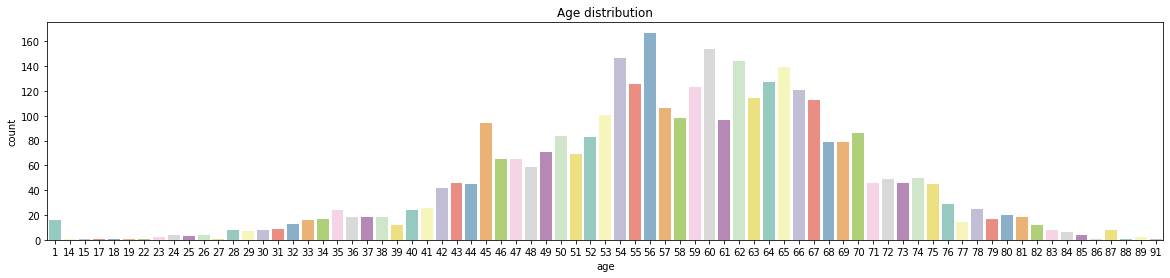

In [93]:
plot_count("age", "Age", data_df, size=5, show_all=True)

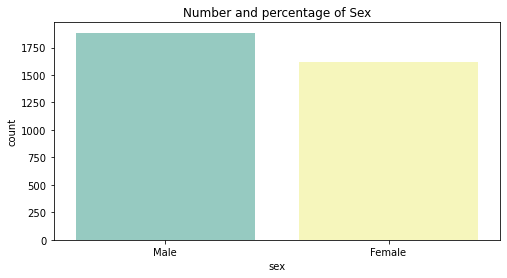

In [94]:
plot_count("sex", "Sex", data_df, size=2)

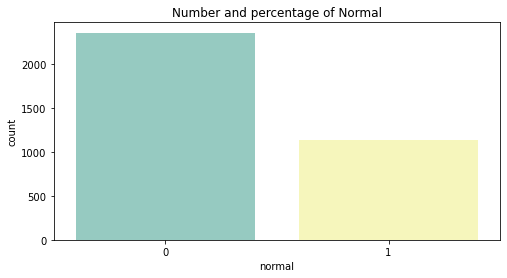

In [95]:
plot_count("normal", "Normal", data_df, size=2)

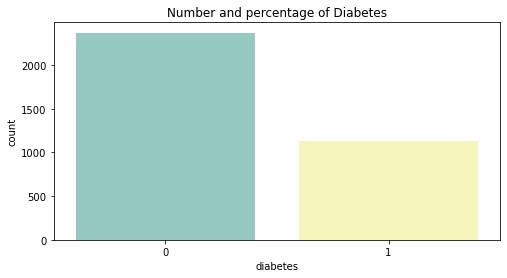

In [96]:
plot_count("diabetes", "Diabetes", data_df, size=2)

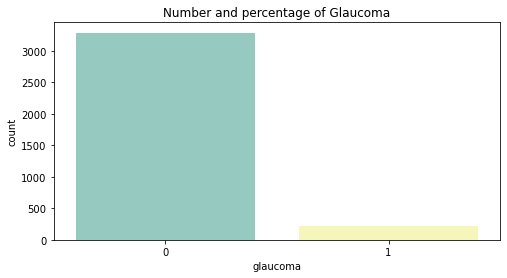

In [97]:
plot_count("glaucoma", "Glaucoma", data_df, size=2)

C:\Users\helov\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\helov\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


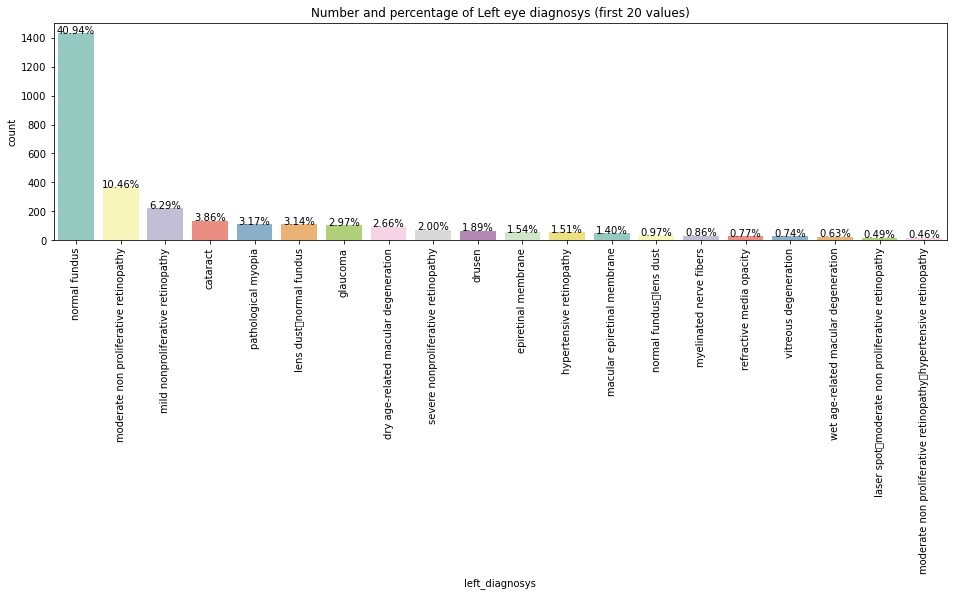

In [98]:
plot_count("left_diagnosys", "Left eye diagnosys (first 20 values)", data_df, size=4)

C:\Users\helov\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\helov\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


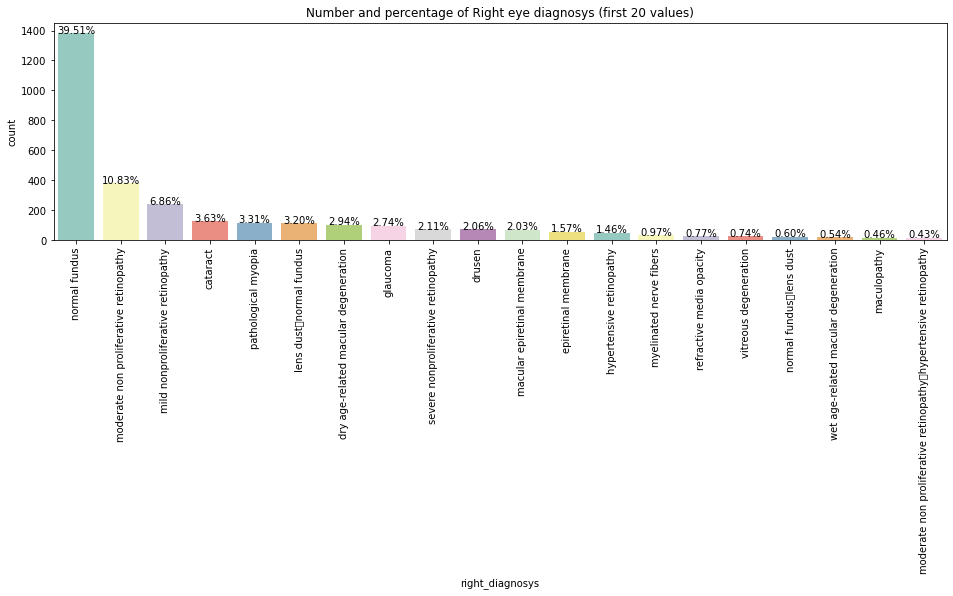

In [99]:
plot_count("right_diagnosys", "Right eye diagnosys (first 20 values)", data_df, size=4)

In [101]:
def plot_feature_distribution_grouped(feature, title, df, hue, size=4):
    plt.figure(figsize=(size*5, size*2))
    plt.title(title)
    
    if size > 2:
        plt.xticks(rotation=90, size=8)
    
    g = sns.countplot(x=feature, hue=hue, data=df, palette='Set3')
    
    plt.xlabel(feature)
    plt.legend()
    plt.show()

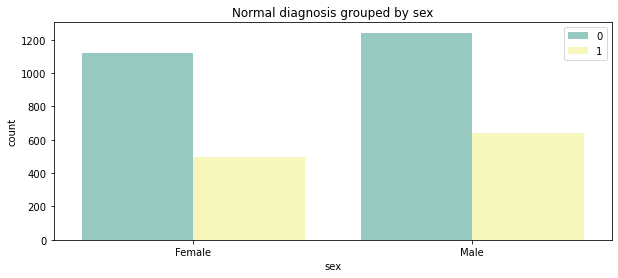

In [102]:
plot_feature_distribution_grouped(
    feature='sex', 
    title='Normal diagnosis grouped by sex', 
    df=data_df, 
    hue='normal', 
    size=2)

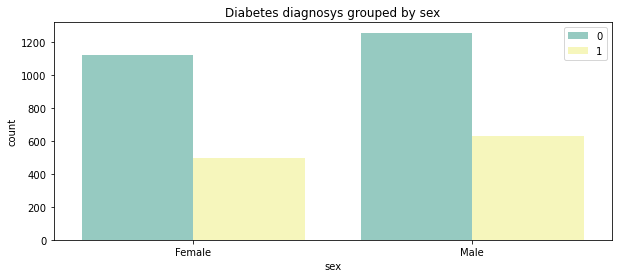

In [103]:
plot_feature_distribution_grouped('sex', 'Diabetes diagnosys grouped by sex', data_df, 'diabetes', size=2)

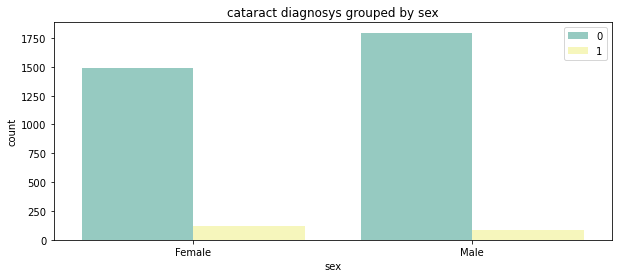

In [105]:
plot_feature_distribution_grouped('sex', 'cataract diagnosys grouped by sex', data_df, 'cataract', size=2)

# Images inspection

Left-eye and right-eye cataract

In [106]:
data_df.head()

,id,age,sex,left_fundus,right_fundus,left_diagnosys,right_diagnosys,normal,diabetes,glaucoma,cataract,amd,hypertension,myopia,other
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [107]:
import imageio
IMAGE_PATH = "C://Users//helov//OneDrive//Documents//ocular disease//ODIR-5K//ODIR-5K//Training Images"
def show_images(df, title="Diagnosys", eye_exam="left_fundus"):
    print(f"{title}; eye exam: {eye_exam}")
    f, ax = plt.subplots(3,3, figsize=(16,16))
    for i,idx in enumerate(df.index):
        dd = df.iloc[idx]
        image_name = dd[eye_exam]
        image_path = os.path.join(IMAGE_PATH, image_name)
        img_data=imageio.imread(image_path)
        ax[i//3, i%3].imshow(img_data)
        ax[i//3, i%3].axis('off')
    plt.show()

Left eye with cataract; eye exam: left_fundus


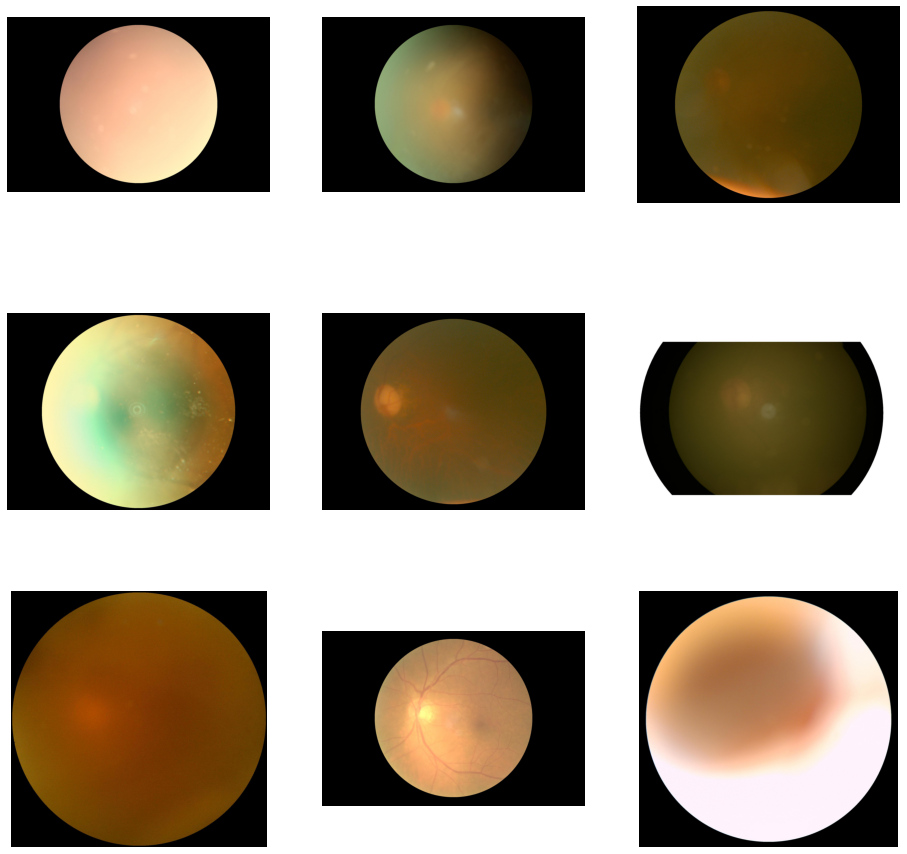

In [108]:
df = data_df.loc[(data_df.cataract==1) & (data_df.left_diagnosys=="cataract")].sample(9).reset_index()
show_images(df,title="Left eye with cataract",eye_exam="left_fundus")

In [109]:
df

,index,id,age,sex,left_fundus,right_fundus,left_diagnosys,right_diagnosys,normal,diabetes,glaucoma,cataract,amd,hypertension,myopia,other
0,1704,2262,65,Female,2262_left.jpg,2262_right.jpg,cataract,mild nonproliferative retinopathy,0,1,0,1,0,0,0,0
1,1598,2137,44,Female,2137_left.jpg,2137_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
2,1661,2204,64,Female,2204_left.jpg,2204_right.jpg,cataract,drusen,0,0,0,1,0,0,0,1
3,1575,2113,52,Female,2113_left.jpg,2113_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
4,1308,1468,79,Male,1468_left.jpg,1468_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
5,1642,2182,70,Male,2182_left.jpg,2182_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
6,1676,2219,68,Female,2219_left.jpg,2219_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
7,1100,1144,60,Male,1144_left.jpg,1144_right.jpg,cataract,cataract，moderate non proliferative retinopathy,0,1,0,1,0,0,0,0
8,822,824,74,Female,824_left.jpg,824_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0


Right eye with cataract; eye exam: right_fundus


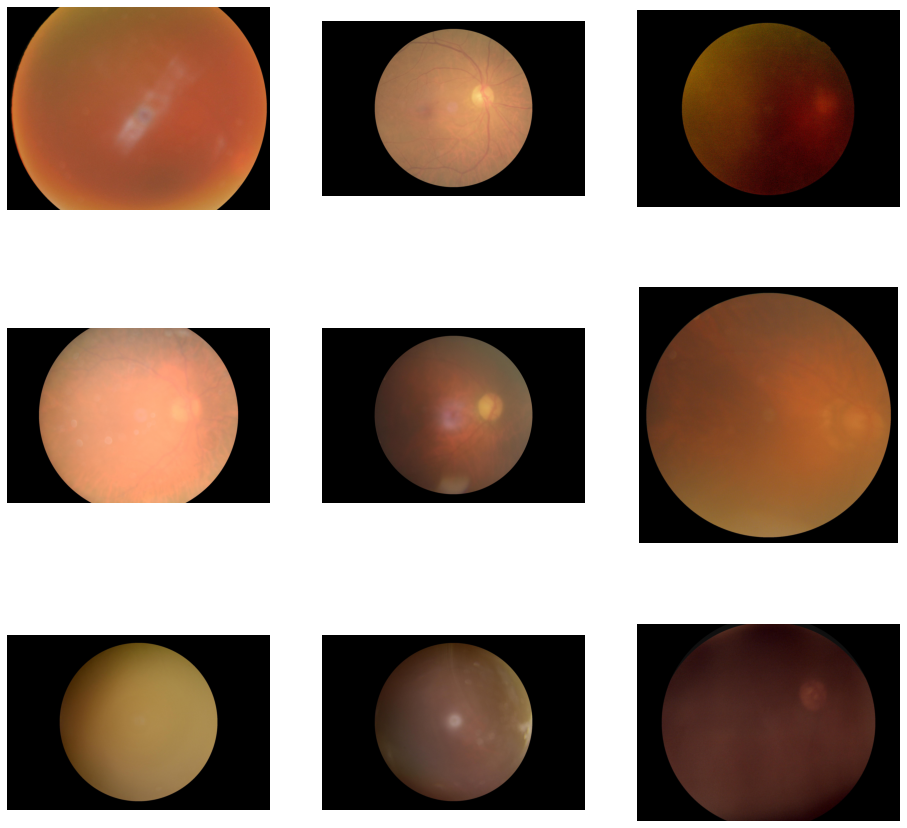

In [110]:
df = data_df.loc[(data_df.cataract==1) & (data_df.right_diagnosys=="cataract")].sample(9).reset_index()
show_images(df,title="Right eye with cataract",eye_exam="right_fundus")

# Left-eye and right-eye glaucom

Left eye with glaucoma; eye exam: left_fundus


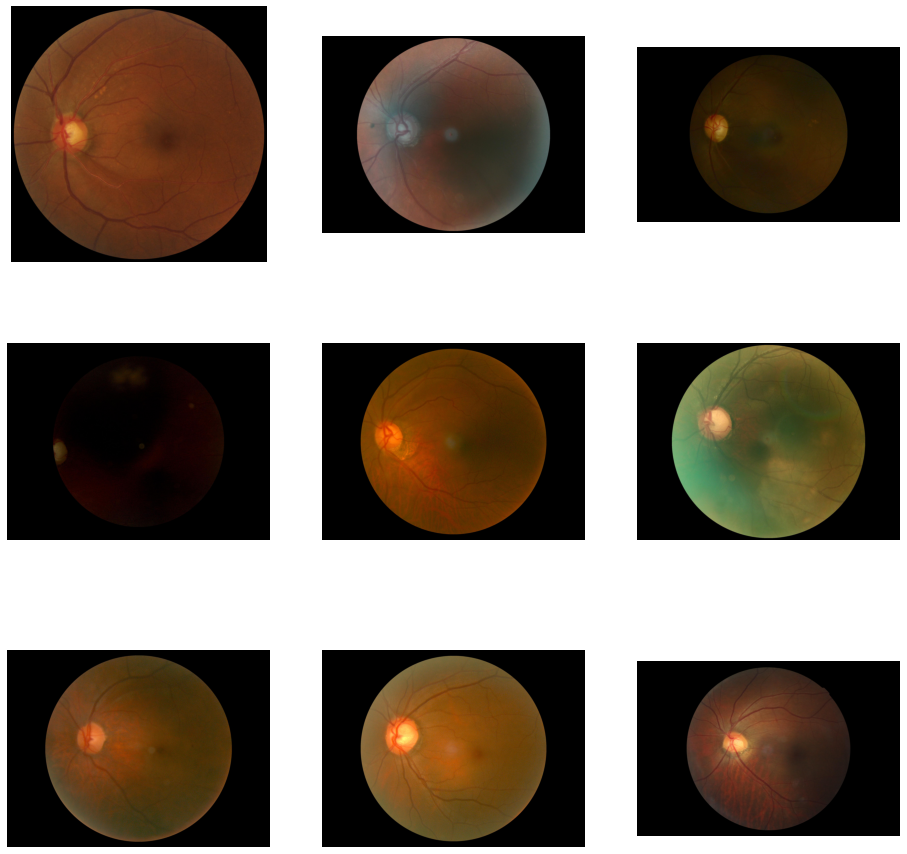

In [111]:
df = data_df.loc[(data_df.glaucoma==1) & (data_df.left_diagnosys=="glaucoma")].sample(9).reset_index()
show_images(df,title="Left eye with glaucoma",eye_exam="left_fundus")